# DATA 201B Final Project

In [433]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True) 

In [443]:
# Retrieve data from UCI's rep
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease = pd.read_csv(url, names = ["age", "sex", "cp", "trestbps", "chol","fbs", "restecg", 
                                 "thalach","exang", "oldpeak","slope", "ca", "thal", "num"])

age: age in years
sex: sex(1 = male; 0 = female)
cp: chest pain type
    -- Value 1: typical angina (典型的心绞痛)
    -- Value 2: atypical angina (非典型的心绞痛)
    -- Value 3: non-anginal pain (非心绞痛)
    -- Value 4: asymptomatic (无症状的)
trestbps: resting blood pressure (静息血压) (in mm Hg on admission to the hospital)
chol: serum cholestoral(血清胆固醇) in mg/dl
fbs: (fasting blood sugar (空腹血糖) > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic (静息心电图) results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (ST-T波异常)(T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy(左心室肥大)
                    by Estes' criteria
thalach: maximum heart rate achieved (最大心率)
exang: exercise induced angina (运动性心绞痛) (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest (ST段下降)
slope: the slope of the peak exercise ST segment
       -- Value 1: upsloping
       -- Value 2: flat
       -- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy (萤光显色的主要血管数目(0-3))
thal: 3 = normal; 6 = fixed defect(固定缺陷); 7 = reversable defect (可逆缺陷)
num: diagnosis of heart disease (angiographic disease status)
     心脏病诊断（血管造影疾病状态）
     -- Value 0: < 50% diameter narrowing
     -- Value 1: > 50% diameter narrowing
     We assume that every value with 0 means heart is okay, and 1,2,3,4 means heart disease.
     血管堵塞程度大于50%的话，可以诊断为冠心病，如果是小于50%的狭窄并不属于冠心病，只是冠状动脉粥样硬化的结果。

ST段改变：
心电图ST段改变 的含义包括ST抬高、压低、延长和缩短。关于ST段一般只讨论压低，也称ST下降。
ST段压低大致可分为ST斜上型压低、斜下型压低和水平型压低三种类型：
目前，公认ST段压低程度以0.5毫米为界限。
当ST段呈水平型和斜下型压低30.5毫米，往往被看作多数具有病理性意义，较多见于以心肌缺血为代表的冠心病，也可发生于心肌病、高血压、洋地黄等药物影响、电解质紊乱、运动员心脏和各种器质性心脏病患者。 　　
当心电图ST段改变呈水平型和斜下型压低<0.5毫米时被看作多数具有可疑病理性意义。
当ST段呈斜上型压低30.5毫米通常认为无确切病理性意义。
当ST段呈斜上型压低<0.5毫米时通常认为对于心脏本身无病理性意义，
后两者较多见于心脏神经官能症，植物神经功能紊乱、甲状腺机能亢进和其他情绪激动、心动过速等具有交感神经兴奋倾向的患者或正常人，尤其多见于正常年轻人（尤其女性年轻人）和更年期妇女。


In [444]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Data Cleaning

In [445]:
# Check None values in the dataframe
none = pd.isna(heart_disease)
cols = ["age", "sex", "cp", "trestbps", "chol","fbs", "restecg", 
                                 "thalach","exang", "oldpeak","slope", "ca", "thal", "num"]
for i in cols:
    for j in range(len(none[i])):
        if none[i][j] == True:
            print('Woops None Value')  
    print('Cleaned Colums')

Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums
Cleaned Colums


In [446]:
# Check unique values of each variables
for i in cols:
    print(heart_disease[i].unique())

[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
[1. 0.]
[1. 4. 3. 2.]
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 29

In [447]:
# Clean meaningless data
heart_disease['thal'] = heart_disease['thal'].mask(heart_disease['thal'] == '?')
heart_disease['ca'] = heart_disease['ca'].mask(heart_disease['ca'] == '?')
heart_disease = heart_disease.dropna()
print(heart_disease['thal'].unique())
print(heart_disease['ca'].unique())

['6.0' '3.0' '7.0']
['0.0' '3.0' '2.0' '1.0']


In [448]:
# Change 'num' into dummy variable in order to know whether having disease or not
heart_disease['num'].loc[heart_disease['num'] >= 1] = 1
heart_disease['num'].unique()

array([0, 1])

In [449]:
# Change 'cp','thal','slope' into dummy variable 
cp_dummy = pd.get_dummies(heart_disease['cp'], prefix = "cp")
thal_dummy = pd.get_dummies(heart_disease['thal'], prefix = "thal")
slope_dummy = pd.get_dummies(heart_disease['slope'], prefix = "slope")
dummy_df = [heart_disease, cp_dummy, thal_dummy, slope_dummy]
heart_disease = pd.concat(dummy_df, axis = 1)
heart_disease = heart_disease.drop(columns = ['cp', 'thal', 'slope'])

## Data Visualization

In [450]:
heart_disease.shape

(297, 21)

In [451]:
#Balanced dataset
countNoDisease = len(heart_disease[heart_disease.num == 0])
countYesDisease = len(heart_disease[heart_disease.num != 0])
print(countNoDisease)
print(countYesDisease)

160
137


In [452]:
# Variable statistics
heart_disease.describe().round(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,131.69,247.35,0.14,1.00,149.60,0.33,1.06,0.46,0.08,0.16,0.28,0.48,0.55,0.06,0.39,0.47,0.46,0.07
std,9.05,0.47,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.50,0.27,0.37,0.45,0.50,0.50,0.24,0.49,0.50,0.50,0.26
min,29.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,56.00,1.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,61.00,1.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00
max,77.00,1.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


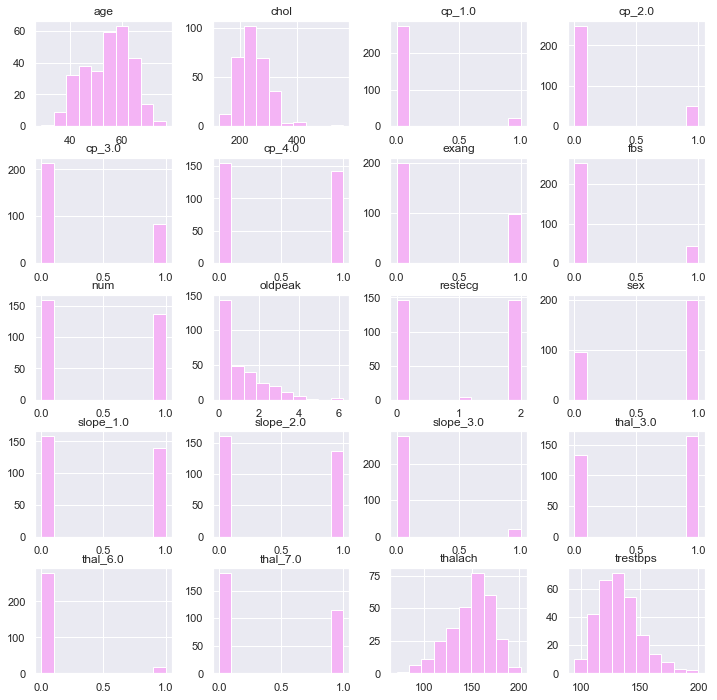

In [72]:
# Visualize the data values of variables
fig=plt.figure(figsize=(12,12))
ax=fig.gca() # get the current polar axes
heart_disease.hist(ax=ax, color = '#F4B4F5')
plt.show()

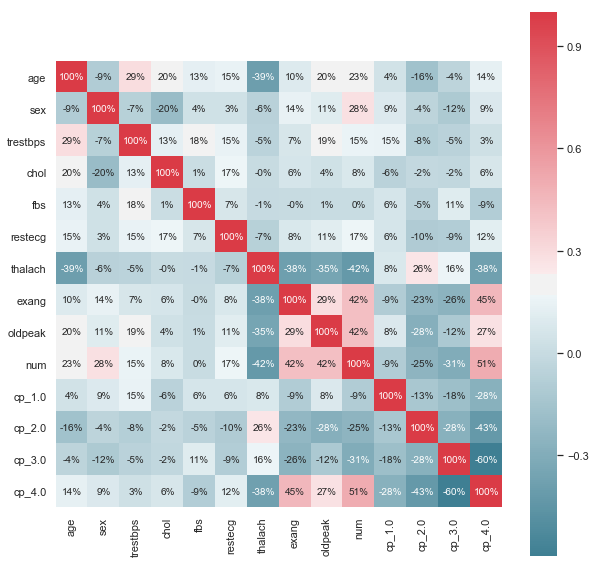

In [73]:
# Visualize the correlations between each of two variables
plt.figure(figsize=(10,10))
sns.heatmap(heart_disease.iloc[:,0:15].corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True,fmt=".0%")
plt.show()

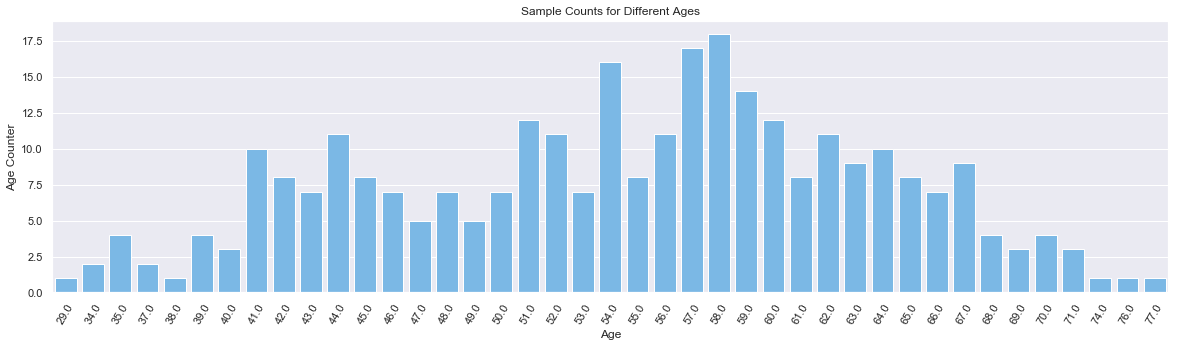

In [14]:
# Visualize how many samples in each age
age_counts = heart_disease.age.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = age_counts.index, y = age_counts.values, color = '#69BBF7')
plt.xlabel('Age')
plt.xticks(rotation = 60)
plt.ylabel('Age Counter')
plt.title('Sample Counts for Different Ages')
plt.show()

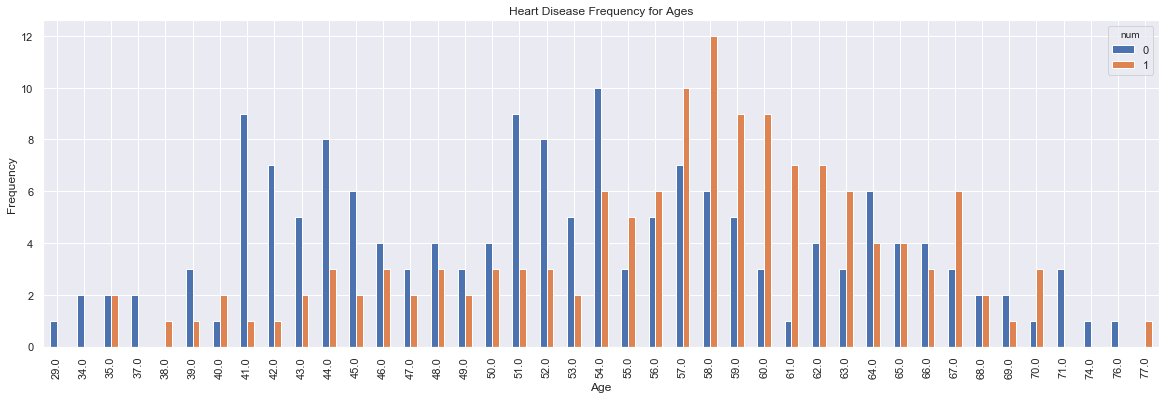

In [15]:
#Check Heart Disease Frequency for Ages
pd.crosstab(heart_disease.age,heart_disease.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndAges.png')
plt.show()

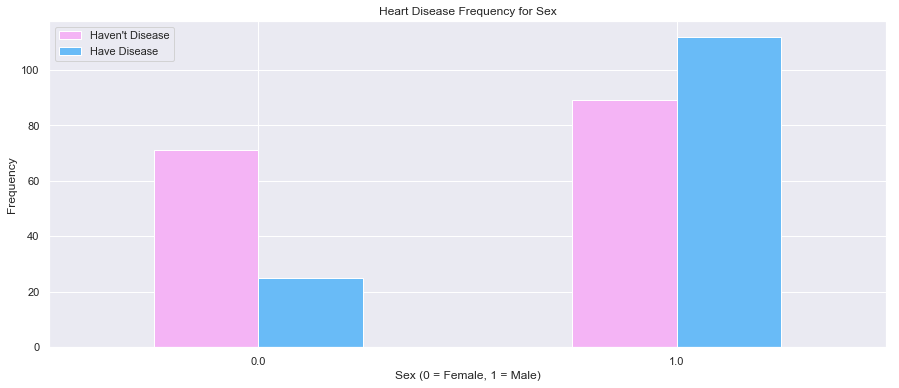

In [74]:
#Sex and Heart Disease Frequency
pd.crosstab(heart_disease.sex,heart_disease.num).plot(kind="bar",figsize=(15,6),color=['#F4B4F5','#69BBF7' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

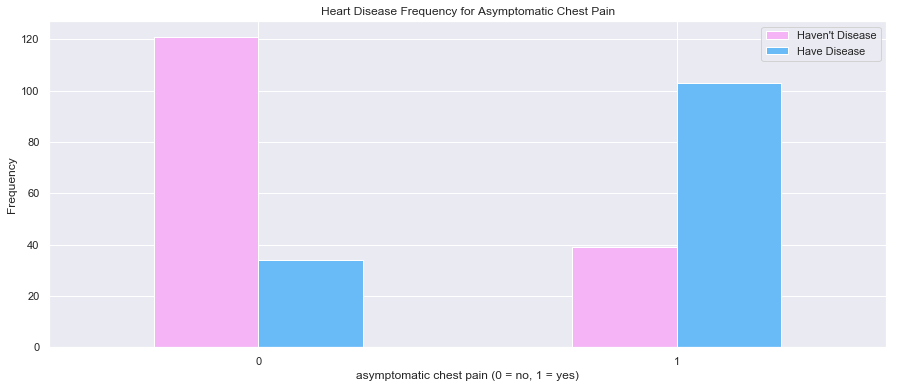

In [77]:
#Sex and Heart Disease Frequency
pd.crosstab(heart_disease['cp_4.0'],heart_disease.num).plot(kind="bar",figsize=(15,6),color=['#F4B4F5','#69BBF7' ])
plt.title('Heart Disease Frequency for Asymptomatic Chest Pain')
plt.xlabel('asymptomatic chest pain (0 = no, 1 = yes)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## Modeling

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [270]:
# Create x and y
y  = heart_disease['num'].values
x = heart_disease.drop(['num'], axis = 1)
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(x)

In [412]:
#Split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [413]:
#Logistic Regression
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 81.67%


In [414]:
#SVM use radius basis function
from sklearn.svm import SVC

svm = SVC(kernel='rbf',C=0.001)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['rbf_SVM'] = acc
print("Test Accuracy of RBF SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of RBF SVM Algorithm: 50.00%


In [415]:
#SVM use linear kernel
model = SVC(kernel = 'linear').fit(x_train, y_train)

acc = model.score(x_test,y_test)*100
accuracies['linear_SVM'] = acc
print("Test Accuracy of Linear SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of Linear SVM Algorithm: 81.67%


In [339]:
#SVM + PCA: Optimal SVM model
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from itertools import cycle

target_names=['0','1']
def plot_2D(data,target,target_names):
    colors=cycle('rgbcmykw')
    target_ids=range(len(target_names))
    plt.figure()
    for i,c,label in zip(target_ids,colors,target_names):
        plt.scatter(data[target==i,0],data[target==i,1],c=c,label=label)
    plt.legend()
    plt.show()

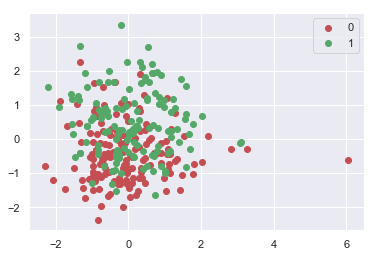

In [370]:
#Plot scatter plot of PCA components and y 
pca=PCA(n_components=7,whiten=True).fit(x)
x_new=pca.transform(x)
plot_2D(x_new, y,target_names)
x_train1, x_test1, y_train1, y_test1 = cross_validation.train_test_split(x_new, y, test_size = 0.2, random_state = 0)

In [390]:
#PCA+SVM use linear kernel
pcasvm=SVC(kernel = 'linear').fit(x_train1, y_train1)

acc = pcasvm.score(x_test1,y_test1)*100
accuracies['Linear_SVM+PCA'] = acc
print("Test Accuracy of linear SVM-PCA model: {:.2f}%".format(acc))

Test Accuracy of linear SVM-PCA model: 85.00%


In [391]:
#PCA+SVM use radius basis function
pcasvm_rbf=SVC(kernel = 'rbf').fit(x_train1, y_train1)

acc = pcasvm_rbf.score(x_test1,y_test1)*100
accuracies['rbfSVM+PCA'] = acc
print("Test Accuracy of rbf SVM-PCA Algorithm: {:.2f}%".format(acc))

Test Accuracy of rbf SVM-PCA Algorithm: 85.00%


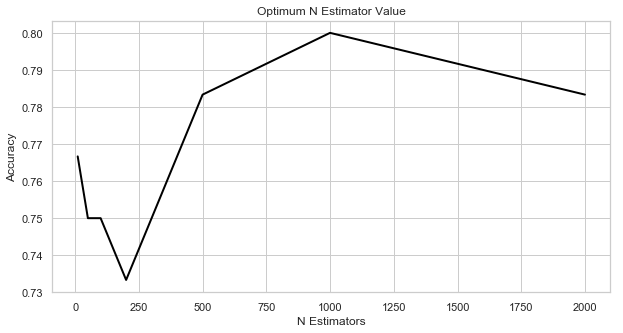

Random Forest Algorithm Accuracy Score : 80.00%


In [424]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
estimators = [10, 50, 100, 200, 500, 1000, 2000]
for i in estimators:
    RFfind = RandomForestClassifier(n_estimators = i,random_state=1)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(estimators,scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

In [417]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 71.67%


In [62]:
from sklearn import tree
#conda install pydotplus
import pydotplus
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

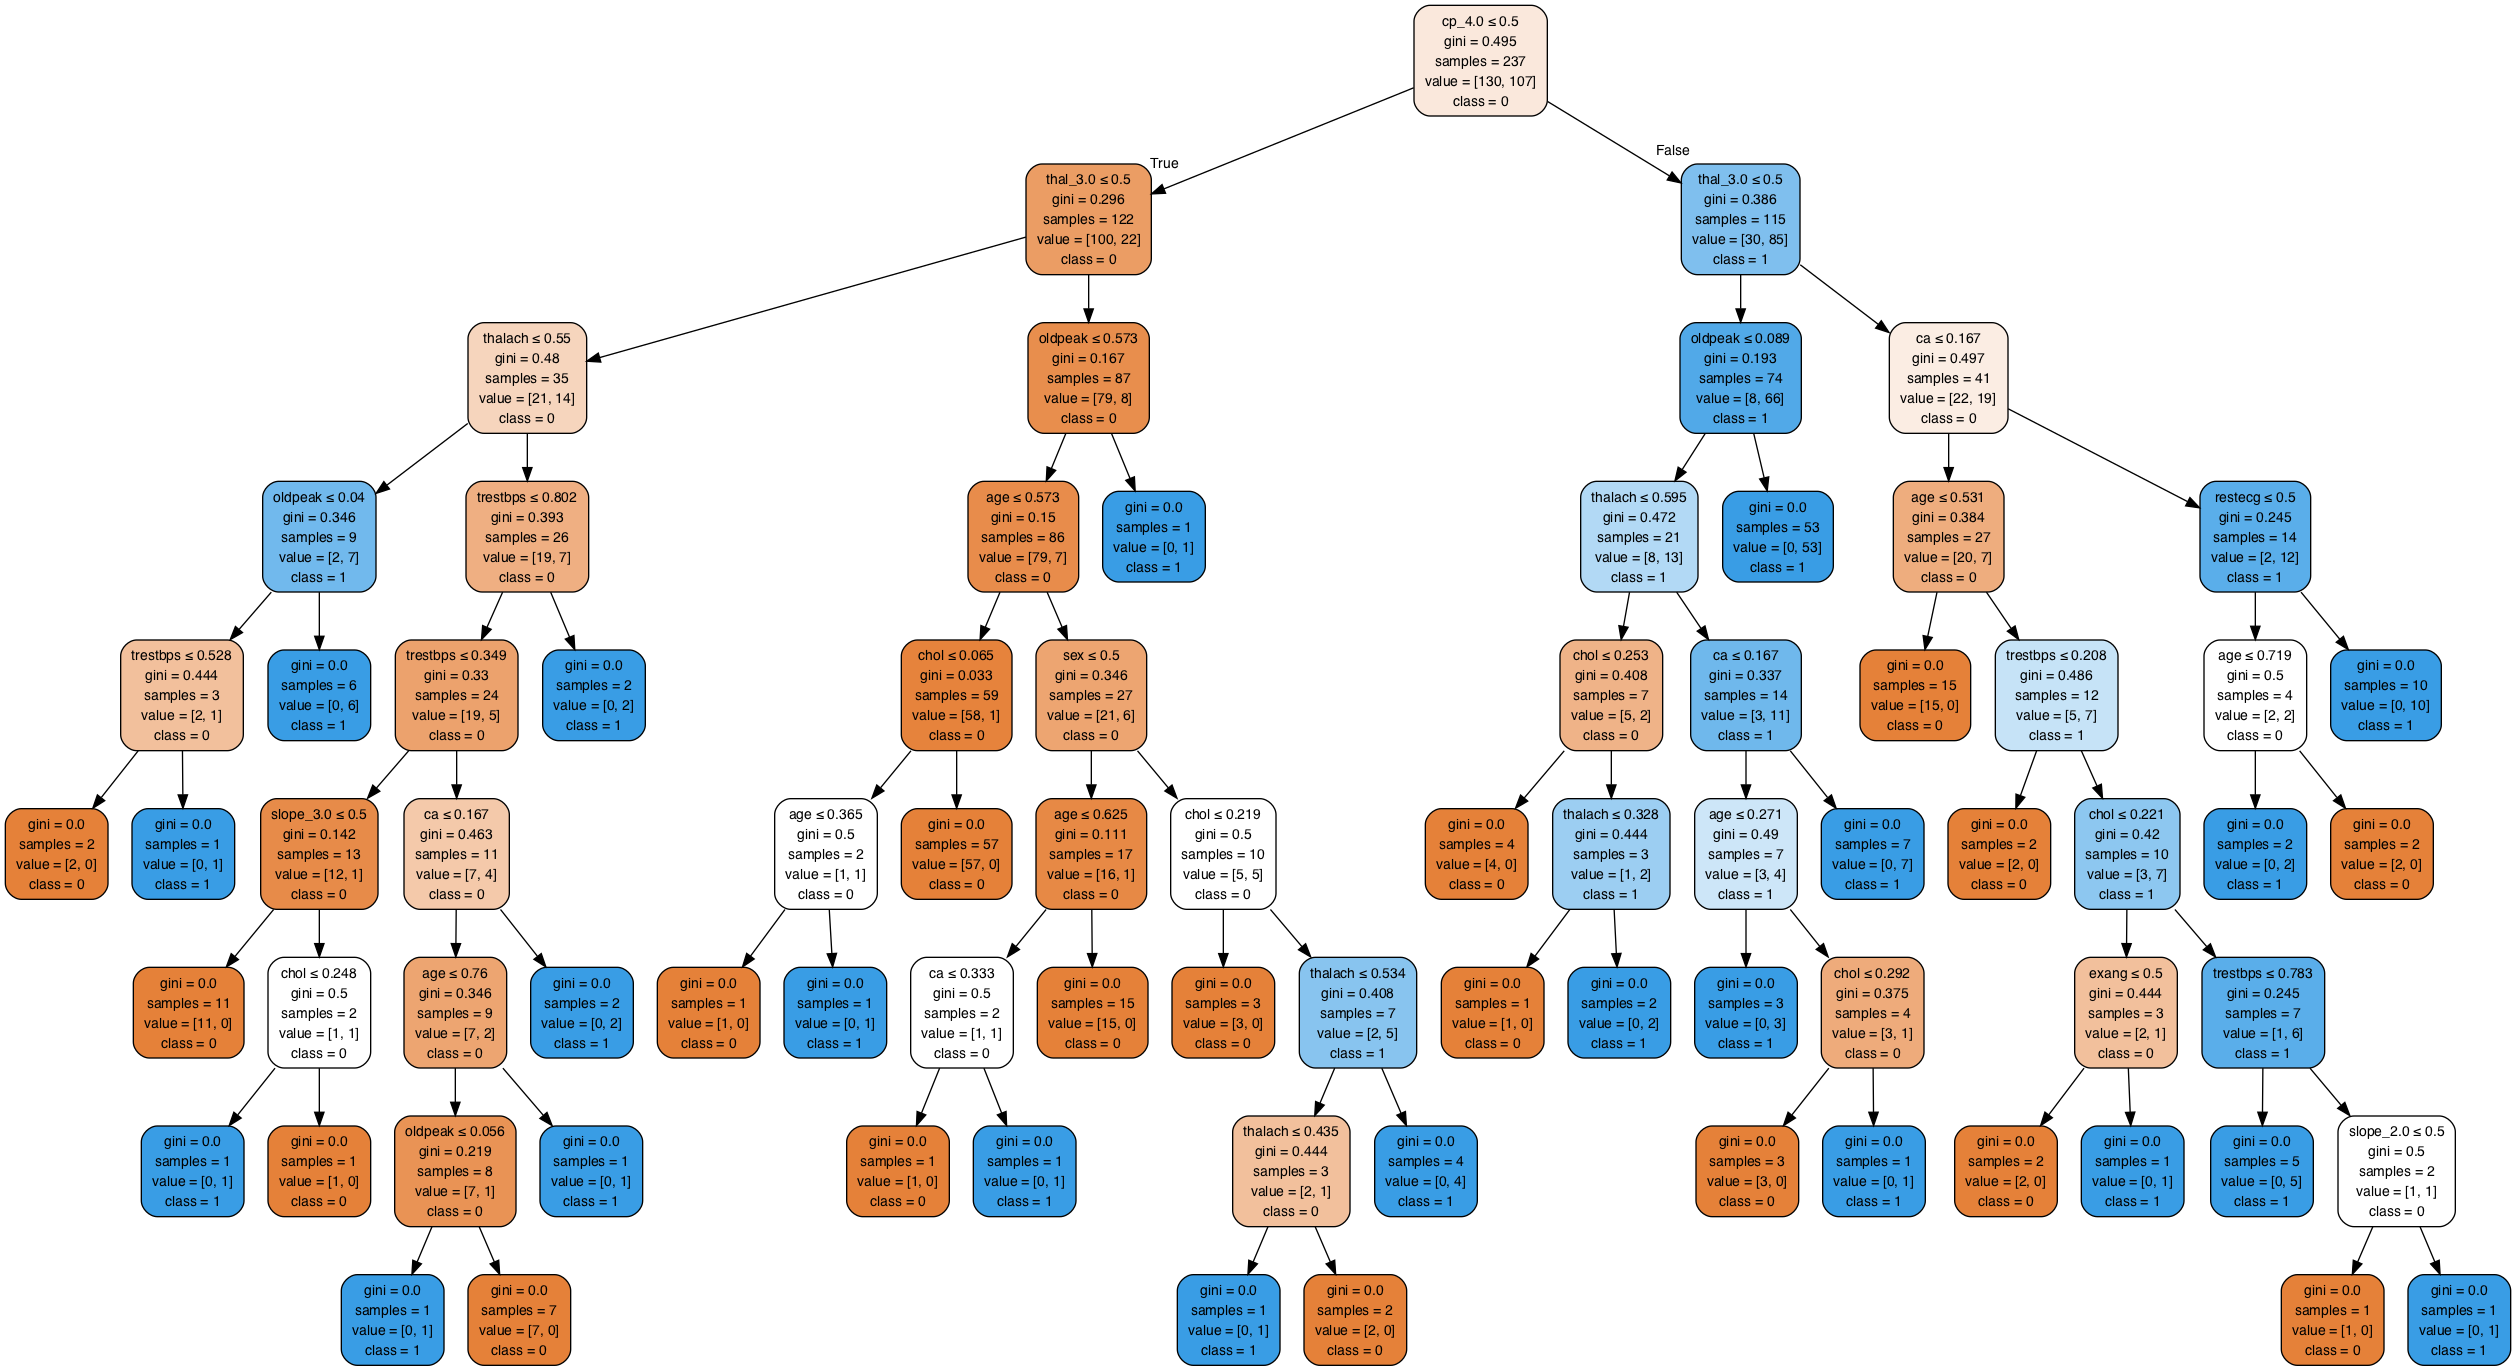

In [84]:
#Decision tree plot 
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Optimize

In [418]:
# Create Decision Tree classifer object and train pre-pruning decision tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)

acc = clf.score(x_test, y_test)*100
accuracies['Pre_Pruning Decision Tree'] = acc
print("Pre_Pruning Decision Tree Test Accuracy {:.2f}%".format(acc))

Pre_Pruning Decision Tree Test Accuracy 76.67%


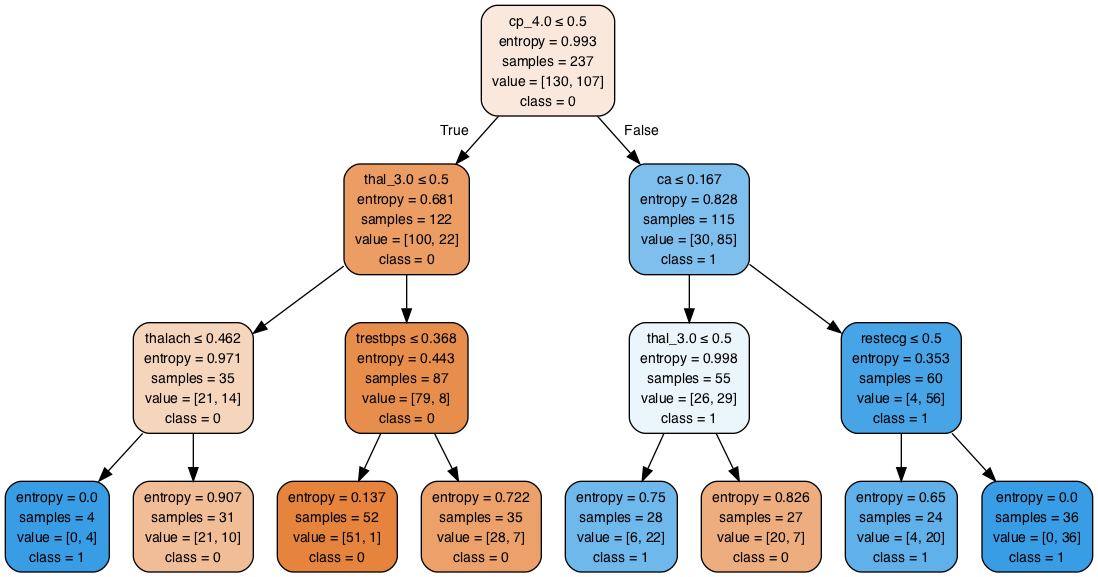

In [81]:
#Optimal decision Plot
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Model Comparision

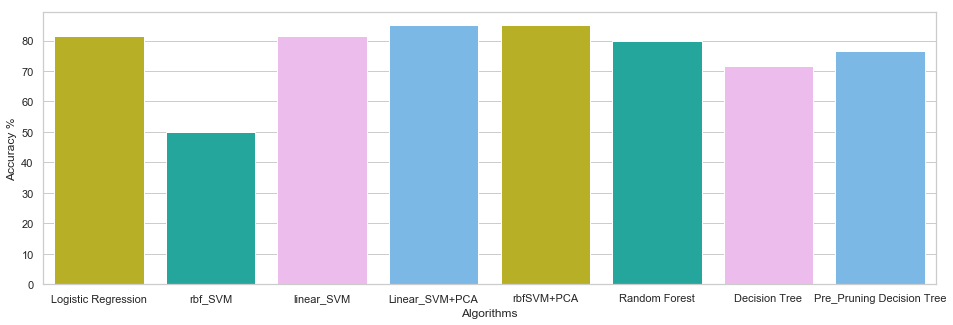

In [395]:
#Model Comparision
colors = ["#CFC60E","#0FBBAE", '#F4B4F5','#69BBF7']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Confusion Matrix

In [419]:
# Predicted values
y_head_lr = lr.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_model = model.predict(x_test)
y_head_pcasvm = pcasvm.predict(x_test1)
y_head_pcasvm_rbf = pcasvm_rbf.predict(x_test1)
y_head_dtc = dtc.predict(x_test)
y_head_clf = clf.predict(x_test)
y_head_rf = rf.predict(x_test)

In [398]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_model = confusion_matrix(y_test,y_head_model)
cm_pcasvm = confusion_matrix(y_test1,y_head_pcasvm)
cm_pcasvm_rbf = confusion_matrix(y_test1,y_head_pcasvm_rbf)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_clf = confusion_matrix(y_test,y_head_clf)
cm_rf = confusion_matrix(y_test,y_head_rf)

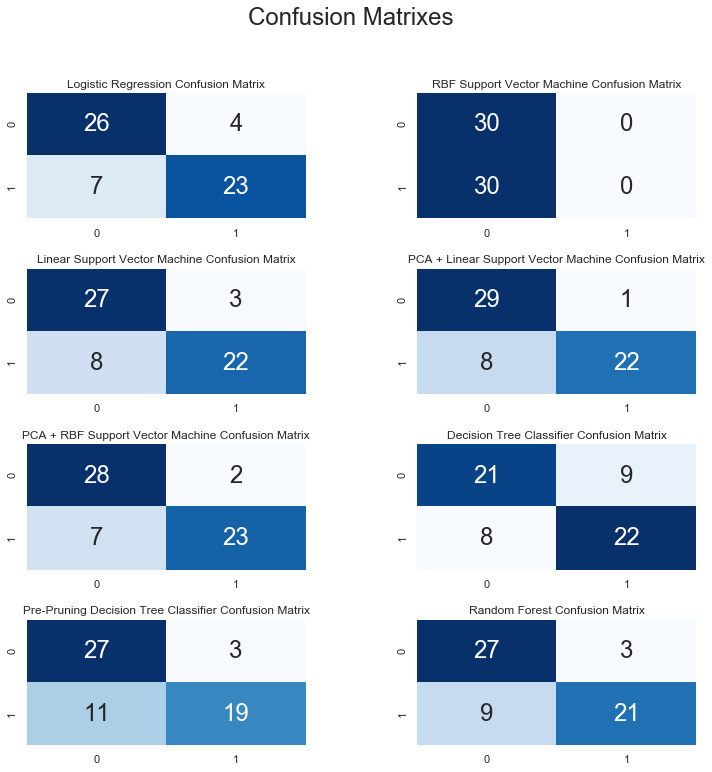

In [421]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(4,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,2,2)
plt.title("RBF Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,2,3)
plt.title("Linear Support Vector Machine Confusion Matrix")
sns.heatmap(cm_model,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,2,4)
plt.title("PCA + Linear Support Vector Machine Confusion Matrix")
sns.heatmap(cm_pcasvm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,2,5)
plt.title("PCA + RBF Support Vector Machine Confusion Matrix")
sns.heatmap(cm_pcasvm_rbf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,2,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,2,7)
plt.title("Pre-Pruning Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_clf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,2,8)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()